In [1]:
# begin by impoprting some useful libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import math 
from sklearn.metrics import r2_score
from scipy import stats

In [2]:
WT_path = '../benchmarking/WT/'
WT_RI_path = '../benchmarking/WT_RI/'
F494N_path = '../benchmarking/F494N/'
F494N_Q637R_path = '../benchmarking/F494N_Q637R/'
F494N_Q637R_F429S_path = '../benchmarking/F494N_Q637R_F429S/'
V510D_path = '../benchmarking/V510D/'
I539T_path = '../benchmarking/I539T/'
EQR_path = '../benchmarking/G550E_R553Q_R555K/'

F508del_path = '../benchmarking/F508del/'
F508del_RI_path = '../benchmarking/F508del_RI/'
F508del_F494N_path = '../benchmarking/F508del_F494N/'
F508del_F494N_Q637R_path = '../benchmarking/F508del_F494N_Q637R/'
F508del_F494N_Q637R_F429S_path = '../benchmarking/F508del_F494N_Q637R_F429S/'
F508del_V510D_path = '../benchmarking/F508del_V510D/'
F508del_I539T_path = '../benchmarking/F508del_I539T/'
F508del_EQR_path = '../benchmarking/F508del_G550E_R553Q_R555K/'

In [136]:
#sampling_method = 'OG_sampling/w_cst/'
sampling_method = 'more_relax_sampling/5_templates_no_cst/'
#sampling_method = 'Qloop_sampling/w_cst/'

In [137]:
def pull_scores(path, mut, num_struct):
    scores = []
    for i in num_struct:
        fnm = path + sampling_method + 'CM_5uak_NBD1_{}_{}.pdb'.format(mut,i)
        with open(fnm) as fp:
            for i, line in enumerate(fp):
                if i <3:
                    continue
                elif i == 3:
                    scores.append(float(line.split()[2]))
                else:
                    break
            fp.close()
    
    return scores 

In [138]:
def get_failed_jobs(path, mut, num_struct):
    failed = []
    for i in num_struct:
        fnm = path + sampling_method + 'CM_5uak_NBD1_{}_{}.pdb'.format(mut,i)
        try:
            with open(fnm) as fp:
                fp.close()
        except OSError: 
            failed.append(i)
            continue
    print('These jobs failed:')
    print(','.join(str(i) for i in failed))

### check for failed jobs

In [139]:
get_failed_jobs(F494N_path, 'F494N', range(1000))

These jobs failed:



In [140]:
x = [9,14,16,17,23,31,34,42,49,59,60,85,90,97,101,102,120,134,135,142,143,147,148,168,170,172,178,183,184,188,197,235,241,243,246,251,258,260,269,276,295,298,299,315,326,332,340,344,345,358,362,367,374,377,383,384,390,392,399,420,432,445,446,453,454,455,467,482,512,521,529,543,549,556,559,561,566,569,578,585,594,596,612,624,626,643,650,668,683,684,694,698,705,711,713,718,726,748,772,780,797,810,811,825,830,842,846,871,872,874,891,907,914,918,921,925,931,936,952,958,967,979,980,982,986,988,992,998]
print(len(x))

128


### pull data

In [141]:
WT_scores = pull_scores(WT_path, 'WT', range(1000))

In [142]:
F494N_scores = pull_scores(F494N_path, 'F494N', range(1000))

In [143]:
F494N_Q637R_scores = pull_scores(F494N_Q637R_path, 'F494N_Q637R', range(1000))

In [144]:
V510D_scores = pull_scores(V510D_path, 'V510D', range(1000))

In [145]:
I539T_scores = pull_scores(I539T_path, 'I539T', range(1000))

In [146]:
G550E_R553Q_R555K_scores = pull_scores(EQR_path, 'G550E_R553Q_R555K', range(1000))

In [147]:
F508del_scores = pull_scores(F508del_path, 'F508del', range(1000))

In [148]:
F508del_F494N_scores = pull_scores(F508del_F494N_path, 'F508del_F494N', range(1000))

In [149]:
F508del_F494N_Q637R_scores = pull_scores(F508del_F494N_Q637R_path, 'F508del_F494N_Q637R', range(1000))

In [150]:
F508del_V510D_scores = pull_scores(F508del_V510D_path, 'F508del_V510D', range(1000))

In [151]:
F508del_I539T_scores = pull_scores(F508del_I539T_path, 'F508del_I539T', range(1000))

In [152]:
F508del_G550E_R553Q_R555K_scores = pull_scores(F508del_EQR_path, 'F508del_G550E_R553Q_R555K', range(1000))

## sort scores

In [153]:
WT_scores = np.array(WT_scores)
WT_scores.sort(axis=0)

In [154]:
F508del_scores = np.array(F508del_scores)
F508del_scores.sort(axis=0)

In [155]:
F494N_scores = np.array(F494N_scores)
F494N_scores.sort(axis=0)

In [156]:
F508del_F494N_scores = np.array(F508del_F494N_scores)
F508del_F494N_scores.sort(axis=0)

In [157]:
F494N_Q637R_scores = np.array(F494N_Q637R_scores)
F494N_Q637R_scores.sort(axis=0)

In [158]:
F508del_F494N_Q637R_scores = np.array(F508del_F494N_Q637R_scores)
F508del_F494N_Q637R_scores.sort(axis=0)

In [159]:
V510D_scores = np.array(V510D_scores)
V510D_scores.sort(axis=0)

In [160]:
F508del_V510D_scores = np.array(F508del_V510D_scores)
F508del_V510D_scores.sort(axis=0)

In [161]:
I539T_scores = np.array(I539T_scores)
I539T_scores.sort(axis=0)

In [162]:
F508del_I539T_scores = np.array(F508del_I539T_scores)
F508del_I539T_scores.sort(axis=0)

In [163]:
G550E_R553Q_R555K_scores = np.array(G550E_R553Q_R555K_scores)
G550E_R553Q_R555K_scores.sort(axis=0)

In [164]:
F508del_G550E_R553Q_R555K_scores = np.array(F508del_G550E_R553Q_R555K_scores)
F508del_G550E_R553Q_R555K_scores.sort(axis=0)

## only consider the lowest scoring n

In [165]:
n=50

In [166]:
WT_avg = np.mean(WT_scores[:n])
WT_std= np.std(WT_scores[:n])
F508del_avg = np.mean(F508del_scores[:n])
F508del_std = np.std(F508del_scores[:n])

In [167]:
F494N_avg = np.mean(F494N_scores[:n])
F494N_std = np.std(F494N_scores[:n])
F508del_F494N_avg = np.mean(F508del_F494N_scores[:n])
F508del_F494N_std = np.std(F508del_F494N_scores[:n])

In [168]:
F494N_Q637R_avg = np.mean(F494N_Q637R_scores[:n])
F494N_Q637R_std = np.std(F494N_Q637R_scores[:n])
F508del_F494N_Q637R_avg = np.mean(F508del_F494N_Q637R_scores[:n])
F508del_F494N_Q637R_std = np.std(F508del_F494N_Q637R_scores[:n])

In [169]:
#F494N_Q637R_F429S_avg = np.mean(F494N_Q637R_F429S_scores[:n])
#F494N_Q637R_F429S_std = np.std(F494N_Q637R_F429S_scores[:n])
#F508del_F494N_Q637R_F429S_avg = np.mean(F508del_F494N_Q637R_F429S_scores[:n])
#F508del_F494N_Q637R_F429S_std = np.std(F508del_F494N_Q637R_F429S_scores[:n])

In [170]:
V510D_avg = np.mean(V510D_scores[:n])
V510D_std = np.std(V510D_scores[:n])
F508del_V510D_avg = np.mean(F508del_V510D_scores[:n])
F508del_V510D_std = np.std(F508del_V510D_scores[:n])

In [171]:
I539T_avg = np.mean(I539T_scores[:n])
I539T_std = np.std(I539T_scores[:n])
F508del_I539T_avg = np.mean(F508del_I539T_scores[:n])
F508del_I539T_std = np.std(F508del_I539T_scores[:n])

In [172]:
G550E_R553Q_R555K_avg = np.mean(G550E_R553Q_R555K_scores[:n])
G550E_R553Q_R555K_std = np.std(G550E_R553Q_R555K_scores[:n])
F508del_G550E_R553Q_R555K_avg = np.mean(F508del_G550E_R553Q_R555K_scores[:n])
F508del_G550E_R553Q_R555K_std = np.std(F508del_G550E_R553Q_R555K_scores[:n])

## plot benchmark

In [173]:
labels = ['WT','F494N','F494N/Q637R','V510D', 'I539T', 'G550E/R553Q/R555K', 
          '\u0394F508', '\u0394F508/F494N','\u0394F508/F494N/Q637R','\u0394F508/V510D','\u0394F508/I539T','\u0394F508/G550E/R553Q/R555K']

bnchmrk = [WT_avg, F494N_avg, F494N_Q637R_avg, V510D_avg, I539T_avg, G550E_R553Q_R555K_avg, 
           F508del_avg, F508del_F494N_avg, F508del_F494N_Q637R_avg, F508del_V510D_avg, F508del_I539T_avg, F508del_G550E_R553Q_R555K_avg]

stdevz = [WT_std, F494N_std, F494N_Q637R_std, V510D_std, I539T_std, G550E_R553Q_R555K_std,
           F508del_std, F508del_F494N_std, F508del_F494N_Q637R_std, F508del_V510D_std, F508del_I539T_std, F508del_G550E_R553Q_R555K_std]

expTm = [0,-1.4, -1.5, -2.5, -2.5, -4, 6.2, 5.8, 4.7, 4.9, 0.1, 2]


Text(4.2, -4026.25254, '$r^{2}$ = 0.51')

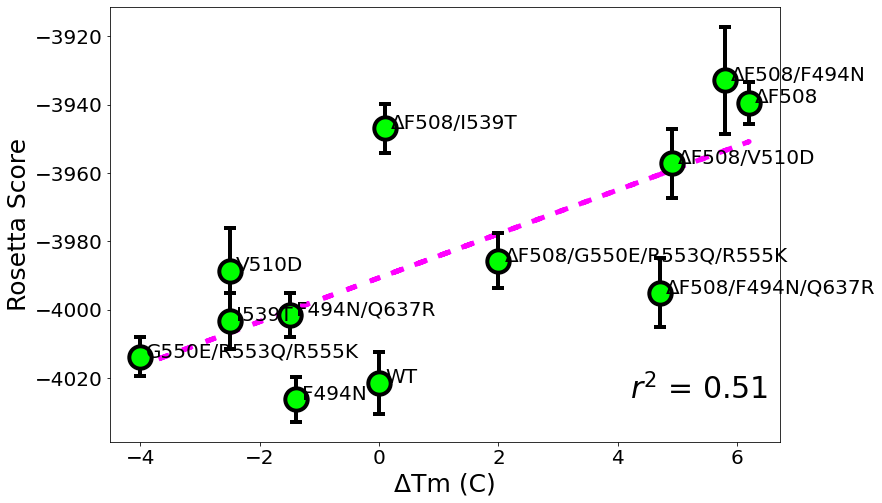

In [174]:
r2 = np.corrcoef(np.array(expTm), np.array(bnchmrk))[0,1]**2
#print('r^2 = ' + str(r2))
plt.figure(figsize=(12,8))
plt.scatter(expTm, bnchmrk, edgecolors='k', linewidth=4, color='lime', s=500, zorder=2)

plt.errorbar(expTm, bnchmrk, yerr = stdevz/np.sqrt(n), fmt='none', linewidth=4, capsize=6, capthick=4, color='k', zorder=1)

for i in range(len(expTm)):
    plt.text(expTm[i]+.1, bnchmrk[i], labels[i], fontsize=20)
    
plt.ylabel('Rosetta Score', fontsize=25)
plt.xlabel('\u0394Tm (C)', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)



m, b = np.polyfit(expTm,bnchmrk, 1)
plt.plot(expTm, m*np.array(expTm) + b, ls='--', color='magenta',dashes=(2, 3), zorder=0, linewidth=5.0)
plt.text(max(np.array(expTm))-2, min( np.array(bnchmrk)), '$r^{2}$ = '+str(r2)[:4], size=30)
#plt.savefig('../figures/6_templates_sampling_TM.svg')

In [175]:
labels2 = ['WT','F494N','F494N/Q637R','V510D', 'G550E/R553Q/R555K', 
          '\u0394F508', '\u0394F508/F494N','\u0394F508/F494N/Q637R','\u0394F508/V510D', '\u0394F508/G550E/R553Q/R555K']

bnchmrk2 = [WT_avg, F494N_avg, F494N_Q637R_avg,V510D_avg, G550E_R553Q_R555K_avg, 
           F508del_avg, F508del_F494N_avg, F508del_F494N_Q637R_avg, F508del_V510D_avg,F508del_G550E_R553Q_R555K_avg]

stdevz2 = [WT_std, F494N_std, F494N_Q637R_std, V510D_std, G550E_R553Q_R555K_std, 
           F508del_std, F508del_F494N_std, F508del_F494N_Q637R_std, F508del_V510D_std, F508del_G550E_R553Q_R555K_std]

dG = [0.0, -0.5, -1.4, 0.0, 1.597,
      -2.7, -2.0, -2.314, -3.18, -0.845]


Text(-3.18, -4026.25254, '$r^{2}$ = 0.49')

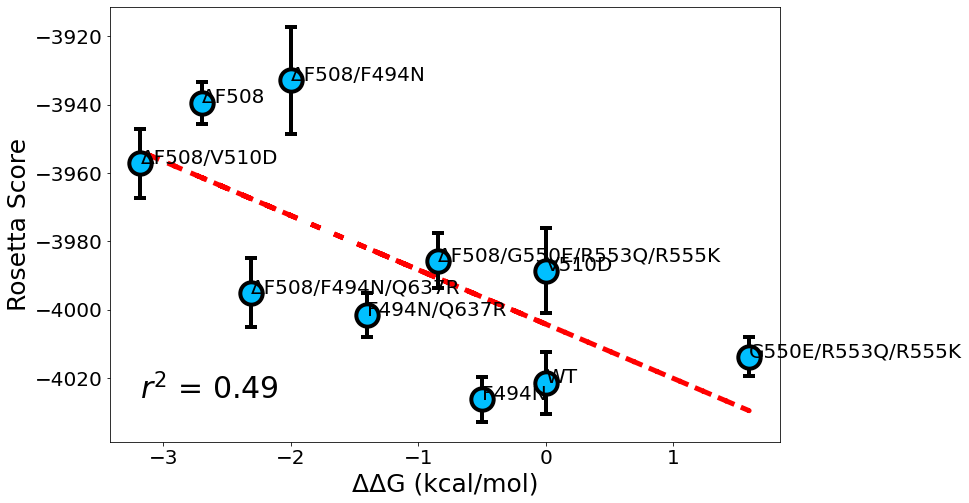

In [176]:
r2 = np.corrcoef(np.array(dG), np.array(bnchmrk2))[0,1]**2
#print('r^2 = ' + str(r2))
plt.figure(figsize=(12,8))

plt.scatter(dG, bnchmrk2, edgecolors='k', linewidth=4, color='deepskyblue', s=500, zorder=2)

plt.errorbar(dG, bnchmrk2, yerr = stdevz2/np.sqrt(n), fmt='none', lw =4, capsize=6, capthick =4,color='k', zorder=1)


for i in range(len(dG)):
    plt.text(dG[i], bnchmrk2[i], labels2[i], fontsize=20)
    
plt.ylabel('Rosetta Score', fontsize=25)
plt.xlabel('\u0394\u0394G (kcal/mol)', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

m, b = np.polyfit(dG, bnchmrk2, 1)
plt.plot(dG, m*np.array(dG) + b, ls='--', color ='r', dashes=(2,3), zorder=0, linewidth=5.0)
plt.text(min(np.array(dG)), min( np.array(bnchmrk2)), '$r^{2}$ = '+str(r2)[:4], size=30)
#plt.savefig('../figures/6_templates_sampling_dG.svg')

In [73]:
temp_num = [3, 4, 5, 6, 7, 9]
low_25 = [0.12, 0.3, 0.46, 0.33, 0.56, 0.21]
low_50 = [0.14, 0.27, 0.54, 0.41, 0.57, 0.25]
low_100 = [0.14, 0.24, 0.57, 0.47, 0.57, 0.27]
low_200 = [0.11, 0.22, 0.57, 0.51, 0.59, 0.32]

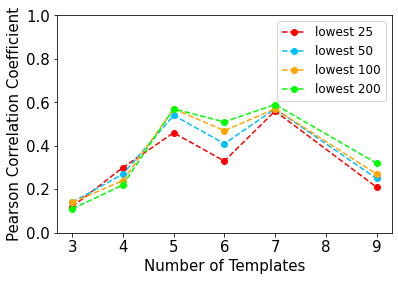

In [227]:
plt.plot(temp_num, low_25, ls='--', marker='o', markerfacecolor='r', color='r')
plt.plot(temp_num, low_50, ls='--', marker='o', markerfacecolor='deepskyblue', color='deepskyblue')
plt.plot(temp_num, low_100, ls='--', marker='o', markerfacecolor='orange', color='orange')
plt.plot(temp_num, low_200, ls='--', marker='o', markerfacecolor='lime', color='lime')
plt.ylim(0,1)
plt.xlabel('Number of Templates', size=15)
plt.xticks(size=15)
plt.ylabel('Pearson Correlation Coefficient', size=15)
plt.yticks(size=15)
labels = ['lowest 25', 'lowest 50', 'lowest 100', 'lowest 200']
plt.legend(labels, fontsize=12)

In [22]:
labels = ['WT','F494N','F494N/Q637R','V510D', 'G550E/R553Q/R555K',
          '\u0394F508', '\u0394F508/F494N','\u0394F508/F494N/Q637R','\u0394F508/V510D', '\u0394F508/G550E/R553Q/R555K']

expTm = [0,-1.4, -1.5, -2.5, -4, 6.2, 5.8, 4.7, 4.9, 2]
dG = [0, -0.5, -1.4, 0, 1.597, -2.7, -2, -2.314, -3.18, -0.845]

r^2 = 0.7770057843501976


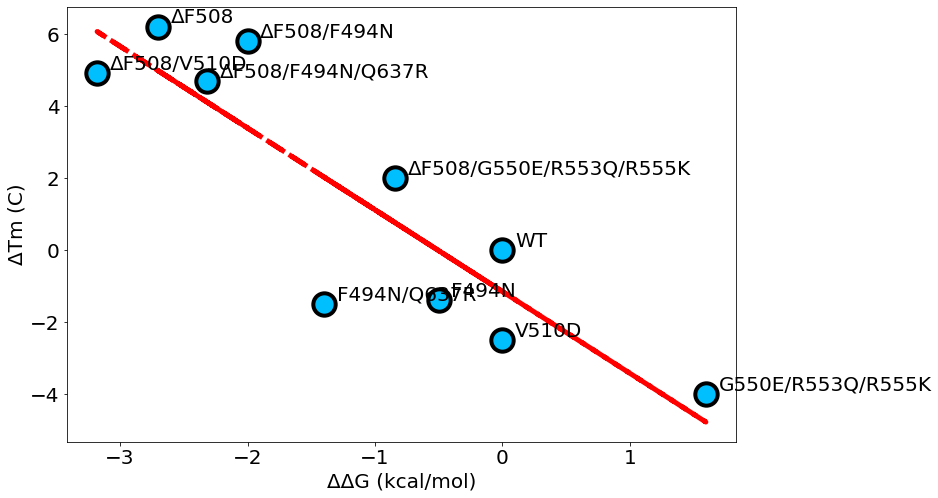

In [23]:
r2 = np.corrcoef(np.array(dG), np.array(expTm))[0,1]**2
print('r^2 = ' + str(r2))
plt.figure(figsize=(12,8))

plt.scatter(dG, expTm, edgecolors='k', lw=4, color='deepskyblue', s=500, zorder=1)

for i in range(len(dG)):
    plt.text(dG[i]+.1, expTm[i]+.1, labels[i], size=20)
    
plt.ylabel('\u0394Tm (C)', size=20)
plt.xlabel('\u0394\u0394G (kcal/mol)', size=20)
    


m, b = np.polyfit(dG, expTm, 1)
plt.plot(dG, m*np.array(dG) + b, ls='--', color ='r',linewidth=5.0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('../figures/TM_vs_dG.svg')

In [ ]:
labels = ['WT','F494N','F494N/Q637R','V510D', 'I539T', 'G550E/R553Q/R555K']
bnchmrk = [WT_avg, F494N_avg, F494N_Q637R_avg,V510D_avg,I539T_avg, G550E_R553Q_R555K_avg]

stdevz = [WT_std, F494N_std, F494N_Q637R_std, V510D_std, I539T_std, G550E_R553Q_R555K_std]

expTm = [0,-1.4, -1.5, -2.5, -2.5, -4]

In [ ]:
r2 = np.corrcoef(np.array(expTm), np.array(bnchmrk))[0,1]**2
print('r^2 = ' + str(r2))
plt.figure(figsize=(6,8))
plt.scatter(expTm, bnchmrk, edgecolors='k', color='lime', s=150, zorder=2)

plt.errorbar(expTm, bnchmrk, yerr = stdevz/np.sqrt(n), fmt='none', capsize=6, color='k', zorder=1)

for i in range(len(expTm)):
    plt.text(expTm[i]+.1, bnchmrk[i], labels[i])
    
plt.ylabel('Rosetta Score', fontsize=20)
plt.xlabel('\u0394Tm (C)', fontsize=20)
    
m, b = np.polyfit(expTm,bnchmrk, 1)
plt.plot(expTm, m*np.array(expTm) + b, ls='-', color='magenta',dashes=(4, 10), zorder=0)

In [ ]:
labels = ['\u0394F508', '\u0394F508/F494N','\u0394F508/F494N/Q637R','\u0394F508/V510D', '\u0394F508/I539T','\u0394F508/G550E/R553Q/R555K']
bnchmrk = [F508del_avg, F508del_F494N_avg, F508del_F494N_Q637R_avg, F508del_V510D_avg, F508del_I539T_avg,F508del_G550E_R553Q_R555K_avg]
stdevz = [F508del_std, F508del_F494N_std, F508del_F494N_Q637R_std, F508del_V510D_std, F508del_I539T_std, F508del_G550E_R553Q_R555K_std]

expTm = [6.2, 5.8, 4.7, 4.9, 0.1, 2]

In [ ]:
r2 = np.corrcoef(np.array(expTm), np.array(bnchmrk))[0,1]**2
print('r^2 = ' + str(r2))
plt.figure(figsize=(6,8))
plt.scatter(expTm, bnchmrk, edgecolors='k', color='lime', s=150, zorder=2)

plt.errorbar(expTm, bnchmrk, yerr = stdevz/np.sqrt(n), fmt='none', capsize=6, color='k', zorder=1)

for i in range(len(expTm)):
    plt.text(expTm[i]+.1, bnchmrk[i], labels[i])
    
plt.ylabel('Rosetta Score', fontsize=20)
plt.xlabel('\u0394Tm (C)', fontsize=20)
    
m, b = np.polyfit(expTm,bnchmrk, 1)
plt.plot(expTm, m*np.array(expTm) + b, ls='-', color='magenta',dashes=(4, 10), zorder=0)

In [ ]:
labels2 = ['WT','F494N','F494N/Q637R','V510D', 'G550E/R553Q/R555K']
bnchmrk2 = [WT_avg,F494N_avg, F494N_Q637R_avg, V510D_avg, G550E_R553Q_R555K_avg]
stdevz2 = [WT_std, F494N_std, F494N_Q637R_std, V510D_std, G550E_R553Q_R555K_std]
dG = [0.0, -0.5, -1.4, 0.0, 1.597]

In [ ]:
r2 = np.corrcoef(np.array(dG), np.array(bnchmrk2))[0,1]**2
print('r^2 = ' + str(r2))
plt.figure(figsize=(6,8))

plt.scatter(dG, bnchmrk2, edgecolors='k', color='deepskyblue', s=150, zorder=2)

plt.errorbar(dG, bnchmrk2, yerr = stdevz2/np.sqrt(n), fmt='none', capsize=6, color='k', zorder=1)


for i in range(len(dG)):
    plt.text(dG[i]+.1, bnchmrk2[i]+.1, labels2[i])
    
plt.ylabel('Rosetta Score', fontsize=20)
plt.xlabel('\u0394\u0394G (kcal/mol)', fontsize=20)
    


m, b = np.polyfit(dG, bnchmrk2, 1)
plt.plot(dG, m*np.array(dG) + b, ls='-', color ='r', dashes=(4, 20), zorder=0)

In [ ]:
labels2 = ['\u0394F508', '\u0394F508/F494N','\u0394F508/F494N/Q637R','\u0394F508/V510D', '\u0394F508/G550E/R553Q/R555K']
bnchmrk2 = [F508del_avg, F508del_F494N_avg, F508del_F494N_Q637R_avg, F508del_V510D_avg, F508del_G550E_R553Q_R555K_avg]
stdevz2 = [F508del_std, F508del_F494N_std, F508del_F494N_Q637R_std, F508del_V510D_std, F508del_G550E_R553Q_R555K_std]
dG = [-2.7, -2.0, -2.314, -3.18, -0.845]

In [ ]:
r2 = np.corrcoef(np.array(dG), np.array(bnchmrk2))[0,1]**2
print('r^2 = ' + str(r2))
plt.figure(figsize=(6,8))

plt.scatter(dG, bnchmrk2, edgecolors='k', color='deepskyblue', s=150, zorder=2)

plt.errorbar(dG, bnchmrk2, yerr = stdevz2/np.sqrt(n), fmt='none', capsize=6, color='k', zorder=1)


for i in range(len(dG)):
    plt.text(dG[i]+.1, bnchmrk2[i]+.1, labels2[i])
    
plt.ylabel('Rosetta Score', fontsize=20)
plt.xlabel('\u0394\u0394G (kcal/mol)', fontsize=20)
    


m, b = np.polyfit(dG, bnchmrk2, 1)
plt.plot(dG, m*np.array(dG) + b, ls='-', color ='r', dashes=(4, 20), zorder=0)